In [1]:
import data_methods as dm
import matplotlib.pyplot as plt
import numpy as np

from visualization_methods import VisualizationMethods as vm

dfs = dm.get_dataframes()
last_key = sorted(dfs.keys(), key=lambda x: x)[-1]
analysis = dm.get_metrics_analysis(
    dfs[last_key], 
    ['lcom', 'cbo', 'wmc', 'rfc'], 
    ['fanin', 'cbo', 'loc', 'rfc']
)

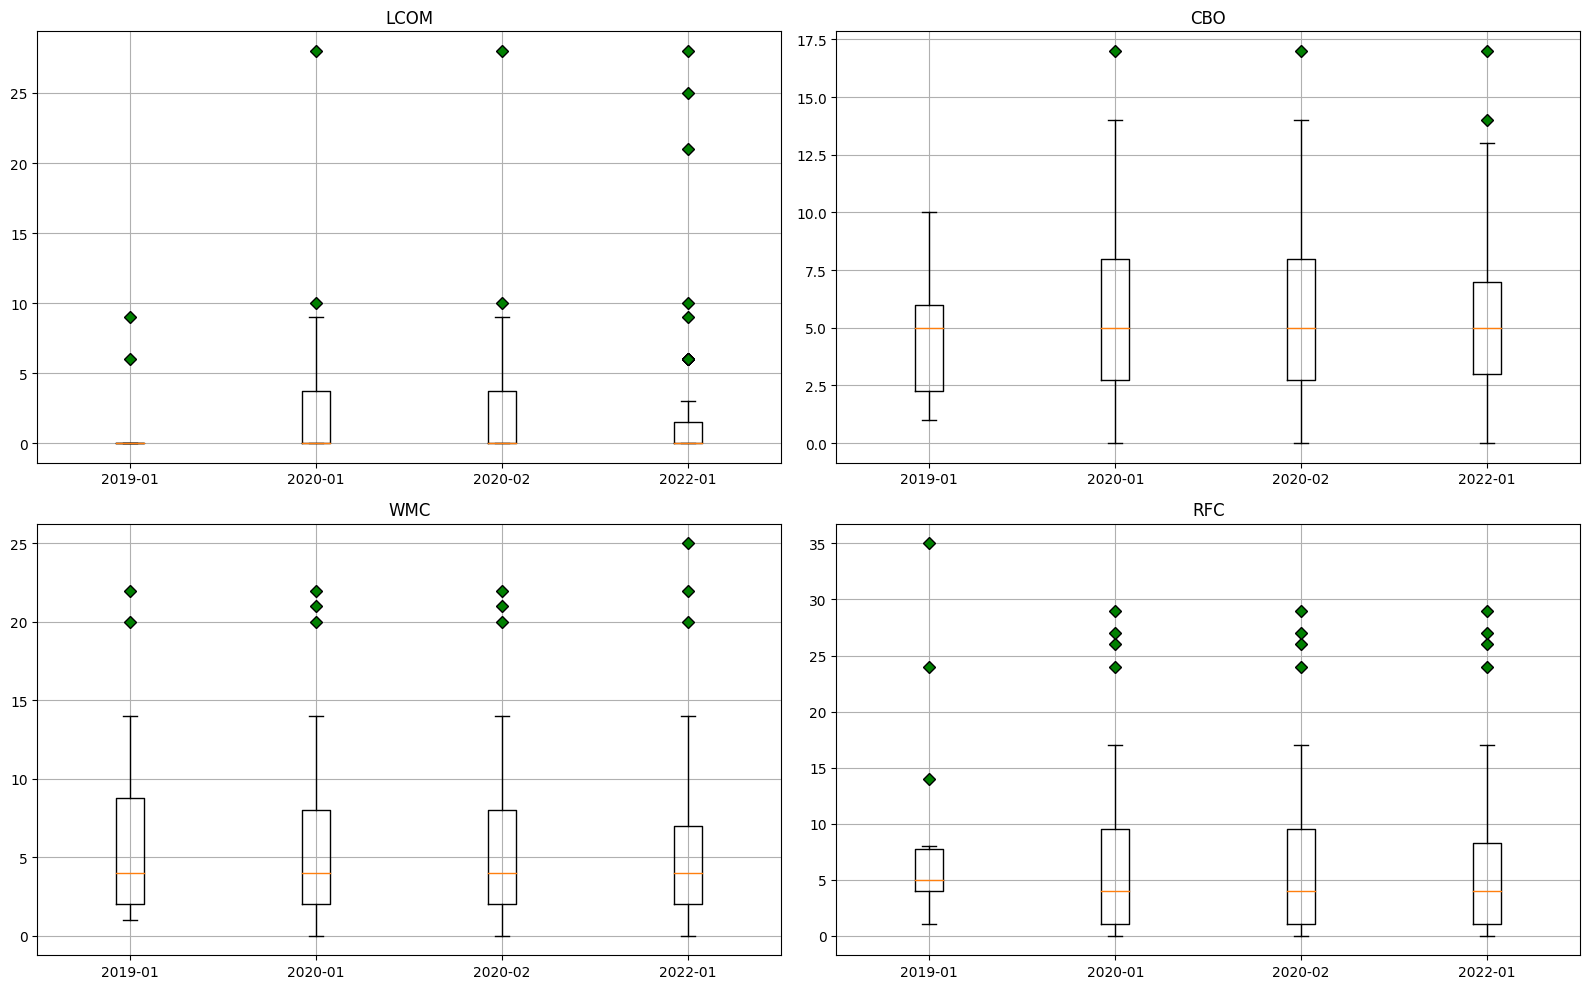

In [2]:
fig, rows = plt.subplots(2, 2, figsize=(16, 10))
fig.set_facecolor('white')

data_dict = {s:d['classes']['lcom'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][0], data_dict, 'LCOM')

data_dict = {s:d['classes']['cbo'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][1], data_dict, 'CBO')

data_dict = {s:d['classes']['wmc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][0], data_dict, 'WMC')

data_dict = {s:d['classes']['rfc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][1], data_dict, 'RFC')

plt.tight_layout()

In [3]:
top = 10
class_top_by_metric = dm.get_data_for_top_by_metric(analysis, 'class', top)

for metric, metric_content in class_top_by_metric.items():
    print('{} AVG: {} - {} STDEV: {}'.format(
        metric.upper(), metric_content['avg'], metric.upper(), metric_content['stdev']
    ))
    print('Top-{} classes with high {}:'.format(top, metric.upper()))
    for r in metric_content['records']:
        print('[{}] - {}'.format(r[0], r[1]))
    print('\n')

LCOM AVG: 2.7115384615384617 - LCOM STDEV: 6.026660442954669
Top-10 classes with high LCOM:
[br.ufmg.engsoft.reprova.tests.mime.json.JsonTest] - 28
[br.ufmg.engsoft.models.User] - 25
[br.ufmg.engsoft.reprova.tests.model.CourseTest] - 21
[br.ufmg.engsoft.reprova.model.ScoreCsv] - 10
[br.ufmg.engsoft.reprova.model.Question$Builder] - 9


CBO AVG: 5.288461538461538 - CBO STDEV: 3.7587668725749492
Top-10 classes with high CBO:
[br.ufmg.engsoft.reprova.routes.api.Score] - 17
[br.ufmg.engsoft.reprova.tests.database.FineGrainedCourseDAOTest] - 14
[br.ufmg.engsoft.reprova.database.QuestionsDAO] - 13
[br.ufmg.engsoft.reprova.tests.mime.json.JsonTest] - 13
[br.ufmg.engsoft.reprova.tests.database.CoarseGrainedCourseDAOTest] - 12
[br.ufmg.engsoft.reprova.tests.model.CourseTest] - 11
[br.ufmg.engsoft.reprova.model.ScoreJson] - 10


WMC AVG: 5.3076923076923075 - WMC STDEV: 5.3043467717105575
Top-10 classes with high WMC:
[br.ufmg.engsoft.reprova.Configuration] - 25
[br.ufmg.engsoft.reprova.routes.ap